**✅ Install Required Packages**


*   **chromadb**: For storing and retrieving data using vector search techniques.
*   **sentence-transformers**: For creating numerical representations (embeddings) of sentences.
* **pandas**: For analyzing data and loading CSV files.
* **matplotlib**: For graphing.
* **scikit-learn**: For statistical evaluation (precision, recall, etc.).

In [1]:
!pip install -q chromadb sentence-transformers pandas scikit-learn

**✅ Import Libraries**
* Import all the tools used to build, retrieve "RAG", and analyze data.

In [2]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import random

Upload medical dataset related to dermatology from **CSV**
* The file containing the dermatology data is uploaded.
* dropna: Deletes any row with a missing title or content.

In [3]:
file_path = "/content/Dataset_Chatbot4Derma_Scraped_Articles.csv"

# Load CSV and drop nulls
#raw_df = pd.read_csv(file_path).dropna(subset=["Title", "Content"])
raw_df = pd.read_csv(file_path, encoding='windows-1256').dropna(subset=["Title", "Content"])

**Info about dataset count of row and column**

In [4]:
raw_df.count()

,0
Title,9570
Author,9570
Categories,9570
Content,9570


**Display 5 sample from dataset**

In [5]:
raw_df.sample(n=10)

,Title,Author,Categories,Content
1576,Chilblains,Unknown Author,Blood vessel problems,Chilblains are tender and/or itchy bumps on ac...
9570,اختبارات الغلوبولين المناعي هـ,مؤلف غير معروف,التشخيص والاختبار,الغلوبولين المناعي E (IgE) هو جسم مضاد يتم إنت...
9361,متلازمة الوظيفة,مؤلف غير معروف,وراثي,متلازمة جوب، والتي تسمى أيضًا متلازمة فرط IgE،...
3434,Lentigo,Unknown Author,"Lesions (benign), Terminology",A lentigo is a pigmented flat or slightly rais...
6642,ورم وعائي كرزي,مؤلف غير معروف,مشاكل الأوعية الدموية,ورم وعائي أو ورم وعائي دموي (التهجئة الأمريكية...
2030,Exanthems,Unknown Author,"Rashes, Terminology",Exanthem is the medical name given to a widesp...
8444,مشاكل الجلد التناسلية,مؤلف غير معروف,الطفح الجلدي,مشاكل الجلد التناسلي شائعة جدًا، وقد تسبب حكة ...
1046,Rashes affecting the lower legs,Unknown Author,Rashes,"Most often, a rash affecting the lower legs is..."
5749,متلازمة آخنباخ,مؤلف غير معروف,مشاكل الأوعية الدموية,متلازمة آخينباخ هي كدمة مؤلمة متكررة ومتكررة ف...
3695,Pityriasis lichenoides,Unknown Author,Rashes,Pityriasis lichenoides (PL) is an uncommon cut...


**✅ Initialize & Create a ChromaDB database**
* ChromaDB is a radial database created to store and retrieve documents based on semantic similarity using the HNSW algorithm and Cossian distance.

In [6]:
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name="derma_knowledge_base",
    metadata={"hnsw:space": "cosine"}
)

**✅ Create a representative model (Embedding)**
* The MiniLM model is used to generate vector representations of sentences.
* This model is multilingual

In [7]:
embedder = SentenceTransformerEmbeddingFunction(model_name="all-MiniLM-L6-v2")  # multilingual & Colab-safe

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**✅ Storing data within ChromaDB**
* Here each document (skin disease) is entered into the database with its information (title - author - medical classification).

In [8]:
for idx, row in raw_df.iterrows():
    doc_id = f"doc_{idx}"
    content = row["Content"]
    metadata = {
        "title": row["Title"],
        "author": row["Author"],
        "category": row["Categories"]
    }
    print('Row No. '+str(idx))
    collection.add(documents=[content], ids=[doc_id], metadatas=[metadata])

print("✅ ChromaDB successfully populated with source-aware dermatology knowledge base")

Streaming output truncated to the last 5000 lines.
Row No. 4698
Row No. 4699
Row No. 4700
Row No. 4701
Row No. 4702
Row No. 4703
Row No. 4704
Row No. 4705
Row No. 4706
Row No. 4707
Row No. 4708
Row No. 4709
Row No. 4710
Row No. 4711
Row No. 4712
Row No. 4713
Row No. 4714
Row No. 4715
Row No. 4716
Row No. 4717
Row No. 4718
Row No. 4719
Row No. 4720
Row No. 4721
Row No. 4722
Row No. 4723
Row No. 4724
Row No. 4725
Row No. 4726
Row No. 4727
Row No. 4728
Row No. 4729
Row No. 4730
Row No. 4731
Row No. 4732
Row No. 4733
Row No. 4734
Row No. 4735
Row No. 4736
Row No. 4737
Row No. 4738
Row No. 4739
Row No. 4740
Row No. 4741
Row No. 4742
Row No. 4743
Row No. 4744
Row No. 4745
Row No. 4746
Row No. 4747
Row No. 4748
Row No. 4749
Row No. 4750
Row No. 4751
Row No. 4752
Row No. 4753
Row No. 4754
Row No. 4755
Row No. 4756
Row No. 4757
Row No. 4758
Row No. 4759
Row No. 4760
Row No. 4761
Row No. 4762
Row No. 4763
Row No. 4764
Row No. 4765
Row No. 4766
Row No. 4767
Row No. 4768
Row No. 4769
Row No. 4770


**✅ Execute a RAG (Retrieval-Augmented Generation) query**
* It takes a query from the user and converts it to a numerical representation.
* Top_k retrieves the documents from the database that are most meaningful to the query.
* It displays the most important sources and their content.

In [9]:
def rag_query(query, top_k=3, canPrint=True):
    # Embed query
    query_vector = embedder(query)
    # Retrieve
    results = collection.query(
        query_texts=[query],
        n_results=top_k
    )
    # Display answer and sources
    if canPrint:
      for i in range(len(results["documents"][0])):
          print(f"\n🔎 Source {i+1}: {results['metadatas'][0][i]['title']}")
          print(f"📚 Category: {results['metadatas'][0][i]['category']}")
          print(f"📝 Content: {results['documents'][0][i][:1000]}...")
    return results

**✅ Evaluation of the accuracy of results**

**Evaluation mechanism:**

* **test_queries**: Test questions to evaluate system performance.
* **expected_keywords**: The keywords that should appear in the correct answer.
* **preds**: The actual results (did the answer contain the keyword?).
* **trues**: A list of true values (used to calculate metrics).

**Then calculate the accuracy:**

* **accuracy**: The percentage of answers that contained the expected words.
* **precision**: Of all the answers the system returned, how many were correct.
* **recall**: Of all the answers it should have known, how many were recognized.
* **f1_score**: A balancing measure between precision and recall.

In [10]:
def evaluate_responses(test_queries, expected_keywords):
    preds, trues = [], []
    for query, expected in zip(test_queries, expected_keywords):
        result = rag_query(query, top_k=1, canPrint=True)
        answer = result["documents"][0][0].lower()
        preds.append(any(kw.lower() in answer for kw in expected))
        trues.append(True)
    #**Now calculate the accuracy:**
    acc = accuracy_score(trues, preds)
    prec = precision_score(trues, preds)
    rec = recall_score(trues, preds)
    f1 = f1_score(trues, preds)
    return acc, prec, rec, f1

**✅ Performance testing with real models**
* These are examples of bilingual questions.
* The answer is checked to see if the important words are present.

In [52]:
# Sample Test Cases
sample_queries = [
    "What causes Allergic contact dermatitis?",
    "طرق علاج القرحة قلاعية عند البالغين",
    "How do I identify fungal skin infection?"
]

expected_keywords = [
    ["allergic", "contact", "dermatitis"],
    ["قلاعية", "علاج", "مراهم"],
    ["fungal", "infection", "rash"]
]

In [53]:
# Evaluation
acc, prec, rec, f1 = evaluate_responses(sample_queries, expected_keywords)

print("\nEvaluation Results")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


🔎 Source 1: Allergic contact dermatitis
📚 Category: Reactions, Rashes
📝 Content: Allergic contact dermatitis is a form of dermatitis/eczema caused by an allergic reaction to a material, called an allergen, in contact with the skin. The allergen is harmless to people that are not allergic to it. Allergic contact dermatitis is also called contact allergy. Allergic contact dermatitis is common in the general population and in specific employment groups. It is more common in women than men, mainly due to nickel allergy and, recently, to acrylate allergy associated with nail cosmetics. Many young children are also allergic to nickel. Contact allergy to topical antibiotics is common in patients over the age of years old. Allergic contact dermatitis is especially common in metal workers, hairdressers, beauticians, health care workers, cleaners, painters, and florists. Allergic contact dermatitis is a type or delayed hypersensitivity reaction and occurs – hours after exposure to the allergen.

**✅ Performance results chart**

In [54]:
# Plotting Performance
metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ["skyblue", "lightgreen", "salmon", "gold"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color=colors)
plt.ylim(0, 1)
plt.title("Chatbot Performance on Dermatological Queries")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
plt.savefig("/content/performance_plot.png")
print("Performance plot saved as file in this path /content/performance_plot.png")

Performance plot saved as file in this path /content/performance_plot.png


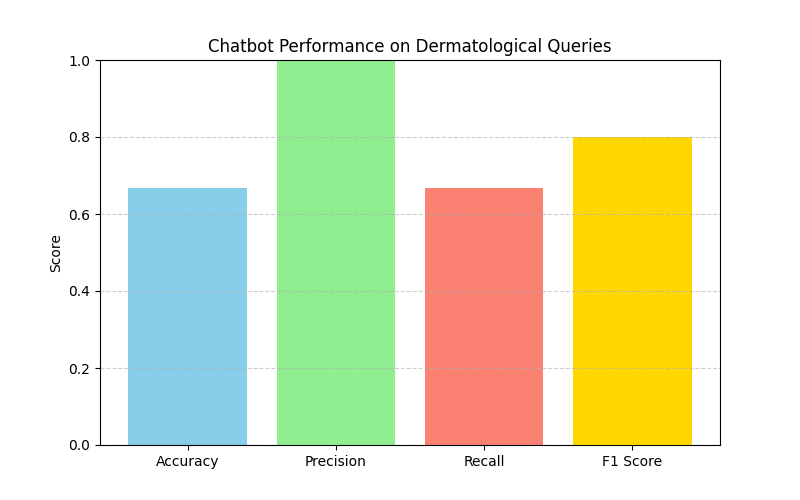

In [55]:
from IPython.display import Image
Image("/content/performance_plot.png")

**🤖 Connecting a Telegram 📲 bot with a RAG model to analyze user inquiries about skin diseases 🤖**

**✅ Install required packages**
* python-telegram-bot: A popular library for building Telegram bots using Python in an asynchronous manner.
* nest_asyncio: Used to circumvent the limitations of asynchronous loops in environments like Jupyter/Colab


In [15]:
!pip install -q python-telegram-bot nest_asyncio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.7/708.7 kB 9.6 MB/s eta 0:00:00


**Import libraries and setting up synchronization loops in Colab**

In [16]:
import nest_asyncio
import asyncio
nest_asyncio.apply() #This line allows you to use async/await within the Colab environment (which runs on its own event loop). Without it, errors will appear when running asyncio-based applications like python-telegram-bot.

from telegram import Update
from telegram.ext import ApplicationBuilder, ContextTypes, MessageHandler, filters, CommandHandler
# Update: Represents a user message or interaction event.
# ContextTypes: Provides context information for each request (such as bot or session information).
# ApplicationBuilder: A way to build a modern bot application.
# MessageHandler: Receives text messages.
# Filters: Filters the message type (such as text only).
# CommandHandler: Handles commands like /start.

**✅ BotFather**
* The token code from BotFather on Telegram.
* This code is what links the bot to your Telegram account.

In [17]:
TELEGRAM_TOKEN = "7623812546:AAH8cU9lRjvSL8WVYFV-46AXN0zcVb-_ys8"

**✅ Dealing with text messages**
* When a message is received from the user, the text is extracted and the query is parsed via the rag_query() function.
* Then Execute a RAG query and respond
* rag_query: Executes a RAG query and retrieves text segments from ChromaDB.
* The content is summarized, combining the title, label, and content into a single message.
* parse_mode="Markdown" enables the use of formatting such as bold headings.

In [18]:
async def handle_message(update: Update, context: ContextTypes.DEFAULT_TYPE):
    user_query = update.message.text
    await update.message.reply_text("🔍  جاري تحليل استفسارك يرجى الانتظار ...")

    try:
        results = rag_query(user_query, top_k=1, canPrint=False)
        response = ""

        for i in range(len(results["documents"][0])):
            title = results['metadatas'][0][i]['title']
            cat = results['metadatas'][0][i]['category']
            content = results['documents'][0][i][:1000] + "..."
            response += f"\n🩺 العنوان: *{title}*\n📚 التصنيف: {cat}\n\n📝 الإجابة: {content}\n\n"

        await update.message.reply_text(response, parse_mode="Markdown")

    except Exception as e:
        await update.message.reply_text(f"Error : {str(e)}")

**This is the welcome response when sending /start.**

In [19]:
async def start(update: Update, context: ContextTypes.DEFAULT_TYPE):
    await update.message.reply_text("مرحباً بك في روبوت الأمراض الجلدية! أرسل وصفاً أو سؤالاً عن الأعراض لتلقي تحليل طبي مبدئي.")

**Bind processors and run the bot**

In [20]:
# Bot settings
app = ApplicationBuilder().token(TELEGRAM_TOKEN).build()
app.add_handler(CommandHandler("start", start))
app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

# Run bot inner colab
await app.initialize()
await app.start()
print("🤖 Telegram bot is running. You can now send messages.")
await app.updater.start_polling()

🤖 Telegram bot is running. You can now send messages.


<Queue at 0x7c750def1ad0 maxsize=0 _getters[1]>